In [1]:
!pip install scikit-learn
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os 

In [2]:
# Path to your models
model_paths_raf_db = ["best_model_vgg_raf-db_1.pth", "best_model_resnet34_raf-db_1.pth", "best_model_resnet18_raf-db_1.pth", "best_model_RAF-DB_1.pth"]
model_paths_fer2013 = ["best_model_vgg_fer2013_1.pth", "best_model_resnet34_fer2013_1.pth", "best_model_resnet18_fer2013_1.pth", "best_model.pth"]

# Transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
def load_data(base_dir, batch_size=16, transform=None):
    """
    Function to load train and test datasets and return their DataLoaders.

    Args:
        base_dir (str): Base directory containing train/test subdirectories.
        batch_size (int): Batch size for the DataLoader.
        transform (callable, optional): Transformations to apply to the images.

    Returns:
        tuple: Train DataLoader, Validation DataLoader
    """
    # Define train and test directories
    train_dir = os.path.join(base_dir, "train")
    val_dir = os.path.join(base_dir, "test")
    
    # Use torchvision.datasets.ImageFolder to automatically handle class folders
    test_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
    
    label_names = test_dataset.classes
    # DataLoaders
    dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    return dataloader, label_names


In [3]:

# Updated evaluate_model function
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            # Move images and labels to the same device as the model
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            # Store predictions and true labels
            all_preds.extend(preds.cpu().numpy())  # Move to CPU for storing
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)
# Plot confusion matrix

def plot_confusion_matrix_normalized(y_true, y_pred, model_name, data_classes):
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix (Counts):\n", conf_matrix)
    
    # Normalize confusion matrix by row (true classes) to get percentages
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)
    print("Confusion Matrix (Percentages):\n", conf_matrix_normalized)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=data_classes)
    disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Display percentages with 2 decimal places
    plt.title("Confusion Matrix (Percentages)")
    plt.show()
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix to values between 0 and 1
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Handle division by zero if present
    
    # Display the confusion matrix as normalized values
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=data_classes)
    disp.plot(cmap="viridis", values_format=".2f")  # Format to show normalized values with two decimals
    plt.title(f"Confusion Matrix for {model_name} (Normalized to 0-1)")
    plt.show()

Confusion Matrix (Counts):
 [[  88   23   10   12   10    5   14]
 [  10   53    3   20   55   10    9]
 [   1    1   39    7    5    6   15]
 [   4    9   10 1044   69   19   30]
 [   4   13    1   31  557   27   47]
 [  10   21   10   47  107  267   16]
 [   5    0   10   16   27    4  267]]
Confusion Matrix (Percentages):
 [[0.54320988 0.14197531 0.0617284  0.07407407 0.0617284  0.0308642
  0.08641975]
 [0.0625     0.33125    0.01875    0.125      0.34375    0.0625
  0.05625   ]
 [0.01351351 0.01351351 0.52702703 0.09459459 0.06756757 0.08108108
  0.2027027 ]
 [0.00337553 0.00759494 0.00843882 0.88101266 0.05822785 0.01603376
  0.02531646]
 [0.00588235 0.01911765 0.00147059 0.04558824 0.81911765 0.03970588
  0.06911765]
 [0.0209205  0.04393305 0.0209205  0.09832636 0.22384937 0.55857741
  0.0334728 ]
 [0.01519757 0.         0.03039514 0.04863222 0.08206687 0.01215805
  0.81155015]]


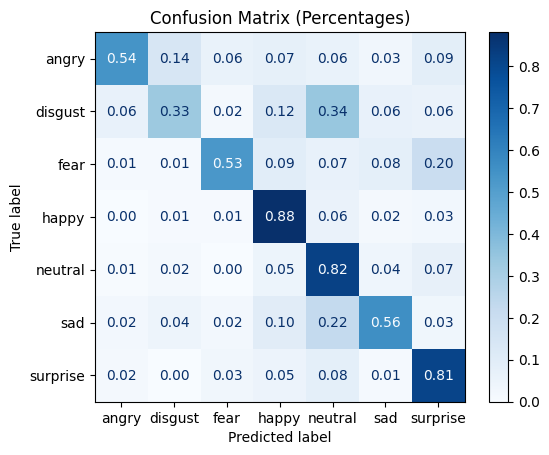

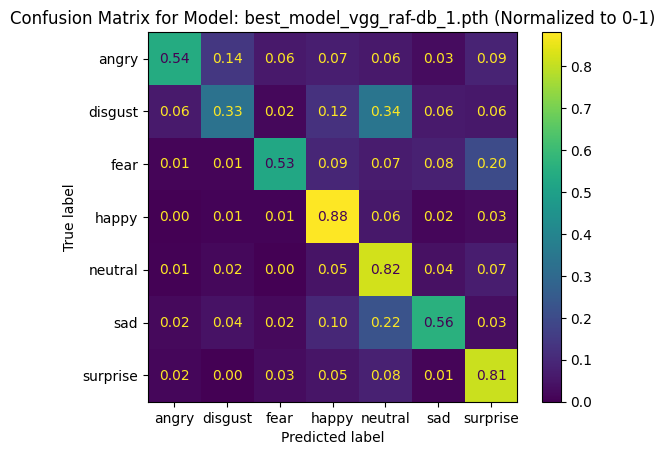

Confusion Matrix (Counts):
 [[  94    7    4   12   15   21    9]
 [  19   46    1   23   45   21    5]
 [   6    1   27   10    3   13   14]
 [  14   13    3 1068   56   25    6]
 [   7   12    0   40  527   79   15]
 [   9    6    2   51   79  322    9]
 [  16    3    5   18   46   14  227]]
Confusion Matrix (Percentages):
 [[0.58024691 0.04320988 0.02469136 0.07407407 0.09259259 0.12962963
  0.05555556]
 [0.11875    0.2875     0.00625    0.14375    0.28125    0.13125
  0.03125   ]
 [0.08108108 0.01351351 0.36486486 0.13513514 0.04054054 0.17567568
  0.18918919]
 [0.01181435 0.01097046 0.00253165 0.90126582 0.04725738 0.02109705
  0.00506329]
 [0.01029412 0.01764706 0.         0.05882353 0.775      0.11617647
  0.02205882]
 [0.01882845 0.0125523  0.0041841  0.10669456 0.16527197 0.67364017
  0.01882845]
 [0.04863222 0.00911854 0.01519757 0.05471125 0.13981763 0.04255319
  0.6899696 ]]


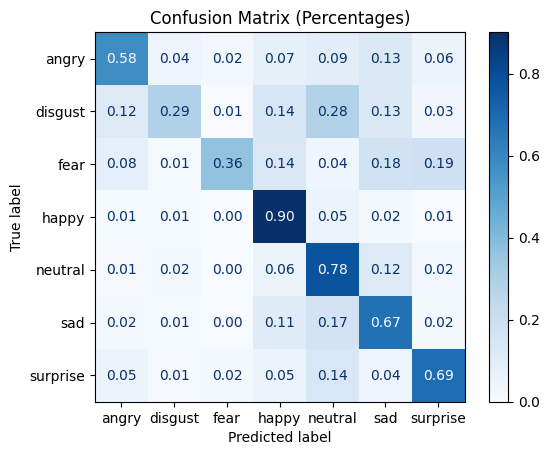

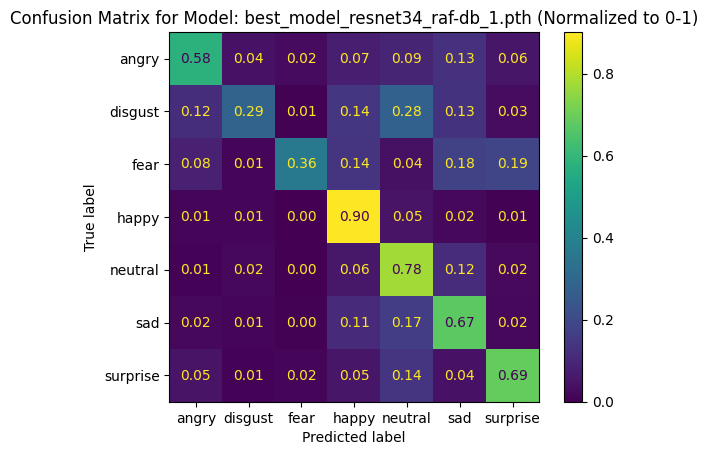

Confusion Matrix (Counts):
 [[  93   12    4   13   19    9   12]
 [  11   60    2   22   45   16    4]
 [   4    2   31    9    6    3   19]
 [   8   13    3 1075   54   17   15]
 [   4   22    1   36  546   52   19]
 [   4   16    7   58   90  292   11]
 [   9    3    4   18   35    8  252]]
Confusion Matrix (Percentages):
 [[0.57407407 0.07407407 0.02469136 0.08024691 0.11728395 0.05555556
  0.07407407]
 [0.06875    0.375      0.0125     0.1375     0.28125    0.1
  0.025     ]
 [0.05405405 0.02702703 0.41891892 0.12162162 0.08108108 0.04054054
  0.25675676]
 [0.00675105 0.01097046 0.00253165 0.907173   0.04556962 0.01434599
  0.01265823]
 [0.00588235 0.03235294 0.00147059 0.05294118 0.80294118 0.07647059
  0.02794118]
 [0.0083682  0.0334728  0.01464435 0.12133891 0.18828452 0.61087866
  0.02301255]
 [0.02735562 0.00911854 0.01215805 0.05471125 0.10638298 0.02431611
  0.76595745]]


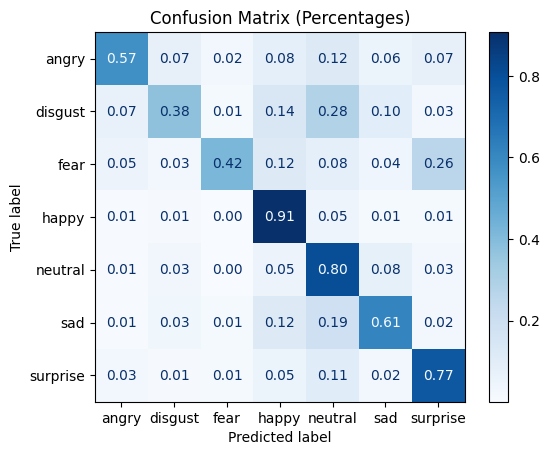

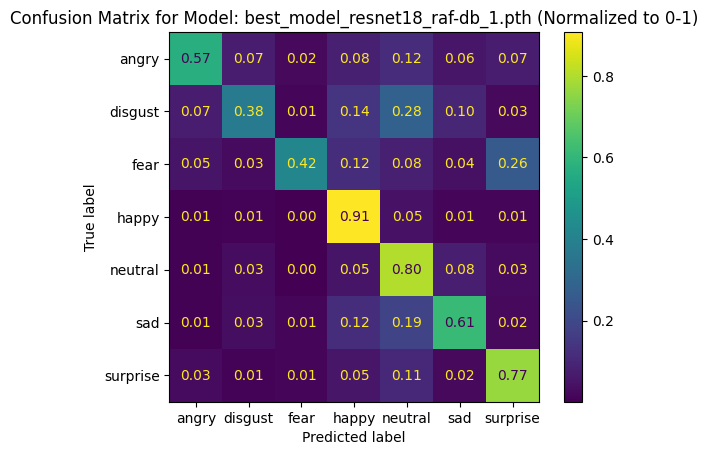

Confusion Matrix (Counts):
 [[ 109   13    4   12    8    6   10]
 [  18   68    0   18   31   18    7]
 [   3    1   35    7    3   10   15]
 [   7   15    4 1080   45   27    7]
 [   2   18    1   45  533   54   27]
 [   8   24    3   43   62  328   10]
 [   4    1    9   12   30    8  265]]
Confusion Matrix (Percentages):
 [[0.67283951 0.08024691 0.02469136 0.07407407 0.04938272 0.03703704
  0.0617284 ]
 [0.1125     0.425      0.         0.1125     0.19375    0.1125
  0.04375   ]
 [0.04054054 0.01351351 0.47297297 0.09459459 0.04054054 0.13513514
  0.2027027 ]
 [0.00590717 0.01265823 0.00337553 0.91139241 0.03797468 0.02278481
  0.00590717]
 [0.00294118 0.02647059 0.00147059 0.06617647 0.78382353 0.07941176
  0.03970588]
 [0.0167364  0.05020921 0.00627615 0.08995816 0.12970711 0.68619247
  0.0209205 ]
 [0.01215805 0.00303951 0.02735562 0.03647416 0.09118541 0.02431611
  0.80547112]]


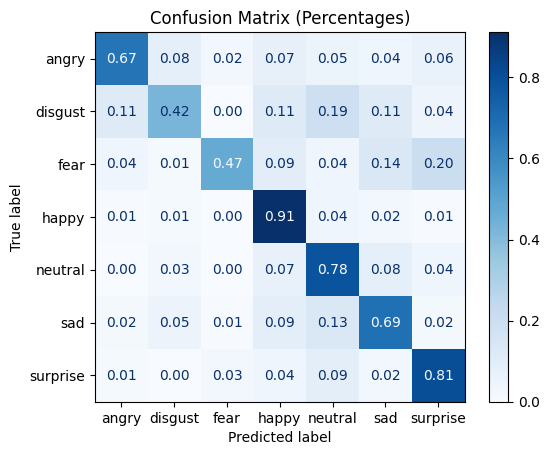

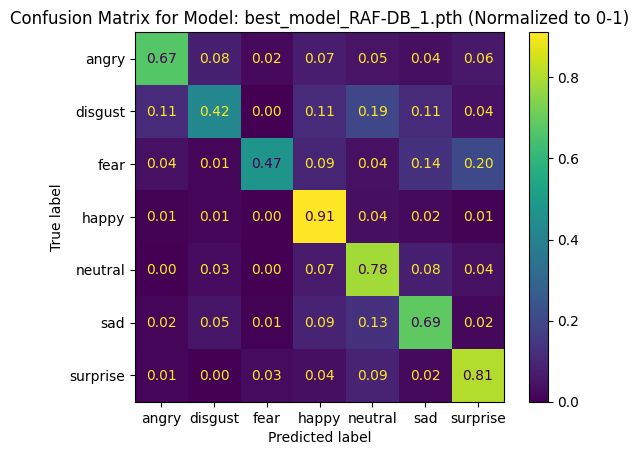

In [4]:
from approach.resnet import ResNet34, ResNet18
from approach.vgg import VGG
from approach.ResEmoteNet import ResEmoteNet

base_dir = "/workspace/RAF-DB"
dataloader, model_labels = load_data(base_dir=base_dir, batch_size=16, transform=transform)

model_architecture_map = {
    model_paths_raf_db[0] : VGG,
    model_paths_raf_db[1] : ResNet34,
    model_paths_raf_db[2] : ResNet18,
    model_paths_raf_db[3] : ResEmoteNet,
    # Add more mappings as needed
}

# Loop through the models, evaluate, and plot confusion matrices
for model_path in model_paths_raf_db:
    if model_path not in model_architecture_map:
        print(f"No architecture found for {model_path}")
        continue
    
    # Initialize the model
    model = model_architecture_map[model_path]()
    
    # Load the state dict
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    
    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Evaluate the model
    preds, labels = evaluate_model(model, dataloader, device)
    
    # Plot confusion matrix
    plot_confusion_matrix_normalized(labels, preds, f"Model: {model_path}", model_labels)

Confusion Matrix (Counts):
 [[ 225    0   71   68  287  289   20]
 [  24    0    6   17   27   36    1]
 [  75    0  201   69  261  319   93]
 [  35    0   54 1125  372  184   55]
 [  11    0   34   54  779  330    8]
 [  18    0   54   70  397  585   15]
 [  10    0  117   74   99   46  451]]
Confusion Matrix (Percentages):
 [[0.234375   0.         0.07395833 0.07083333 0.29895833 0.30104167
  0.02083333]
 [0.21621622 0.         0.05405405 0.15315315 0.24324324 0.32432432
  0.00900901]
 [0.07367387 0.         0.19744597 0.06777996 0.25638507 0.31335953
  0.0913556 ]
 [0.01917808 0.         0.02958904 0.61643836 0.20383562 0.10082192
  0.03013699]
 [0.00904605 0.         0.02796053 0.04440789 0.640625   0.27138158
  0.00657895]
 [0.01580334 0.         0.04741001 0.06145742 0.34855136 0.51360843
  0.01316945]
 [0.01254705 0.         0.1468005  0.09284818 0.12421581 0.05771644
  0.56587202]]


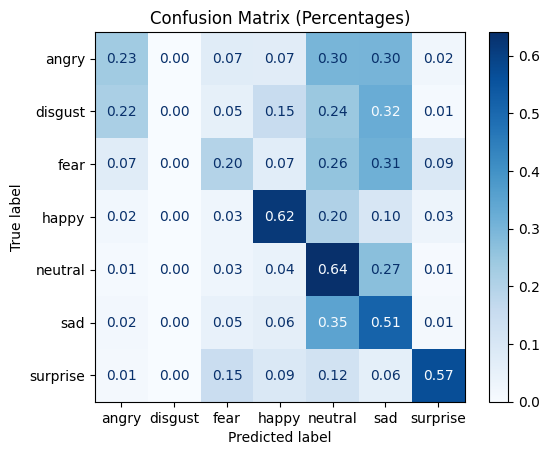

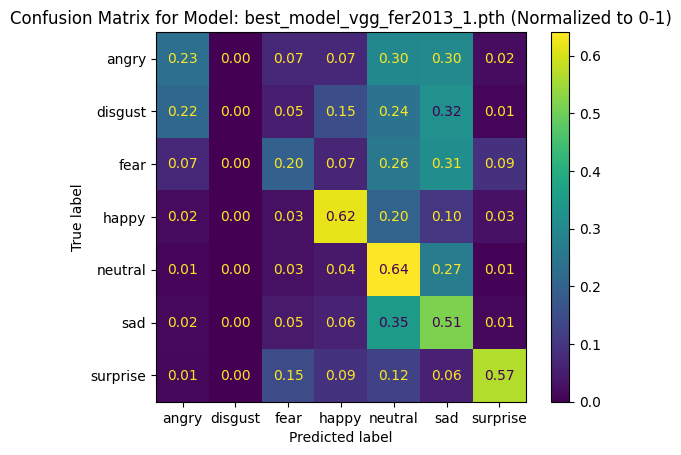

Confusion Matrix (Counts):
 [[ 448    9  118   63  118  180   24]
 [  21   52   11    2   10   13    2]
 [ 112    4  454   53  105  222   68]
 [  66    1   60 1481   92   96   29]
 [  61    2  108  121  662  249   13]
 [  92    3  164   51  176  631   22]
 [  29    1   88   61   36   18  564]]
Confusion Matrix (Percentages):
 [[4.66666667e-01 9.37500000e-03 1.22916667e-01 6.56250000e-02
  1.22916667e-01 1.87500000e-01 2.50000000e-02]
 [1.89189189e-01 4.68468468e-01 9.90990991e-02 1.80180180e-02
  9.00900901e-02 1.17117117e-01 1.80180180e-02]
 [1.10019646e-01 3.92927308e-03 4.45972495e-01 5.20628684e-02
  1.03143418e-01 2.18074656e-01 6.67976424e-02]
 [3.61643836e-02 5.47945205e-04 3.28767123e-02 8.11506849e-01
  5.04109589e-02 5.26027397e-02 1.58904110e-02]
 [5.01644737e-02 1.64473684e-03 8.88157895e-02 9.95065789e-02
  5.44407895e-01 2.04769737e-01 1.06907895e-02]
 [8.07726076e-02 2.63388938e-03 1.43985953e-01 4.47761194e-02
  1.54521510e-01 5.53994732e-01 1.93151888e-02]
 [3.63864492

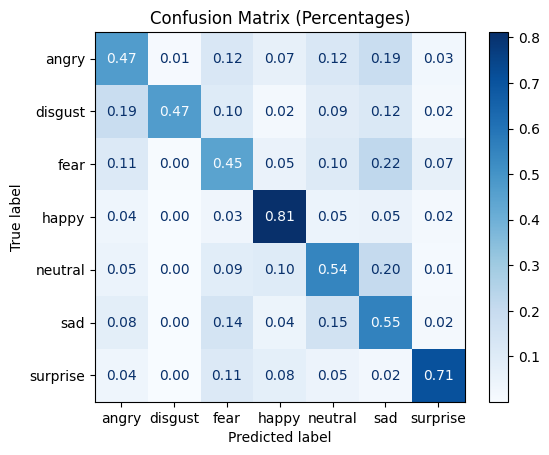

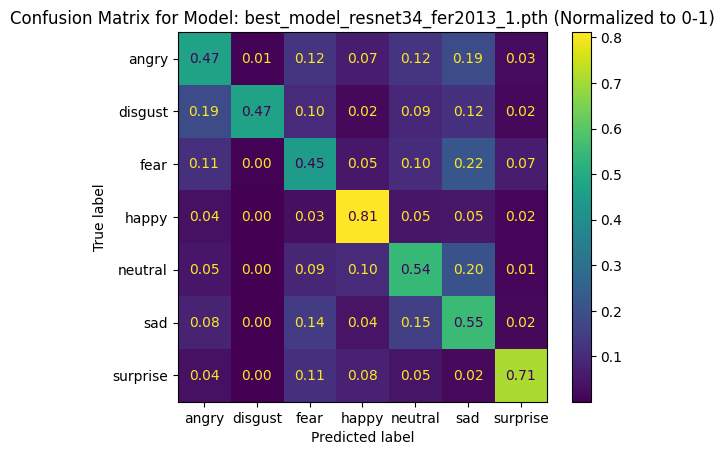

Confusion Matrix (Counts):
 [[ 450    9  107   71  175  125   23]
 [  16   53    8    2   14   13    5]
 [ 125    4  387   86  168  171   77]
 [  55    3   35 1520  116   66   30]
 [  86    4   57  129  774  149   17]
 [  97    6  121   83  276  537   19]
 [  25    6   65   68   57   12  564]]
Confusion Matrix (Percentages):
 [[0.46875    0.009375   0.11145833 0.07395833 0.18229167 0.13020833
  0.02395833]
 [0.14414414 0.47747748 0.07207207 0.01801802 0.12612613 0.11711712
  0.04504505]
 [0.12278978 0.00392927 0.38015717 0.08447937 0.16502947 0.16797642
  0.07563851]
 [0.03013699 0.00164384 0.01917808 0.83287671 0.06356164 0.03616438
  0.01643836]
 [0.07072368 0.00328947 0.046875   0.10608553 0.63651316 0.12253289
  0.01398026]
 [0.08516242 0.00526778 0.10623354 0.07287094 0.24231782 0.4714662
  0.0166813 ]
 [0.03136763 0.00752823 0.08155583 0.08531995 0.07151819 0.01505646
  0.7076537 ]]


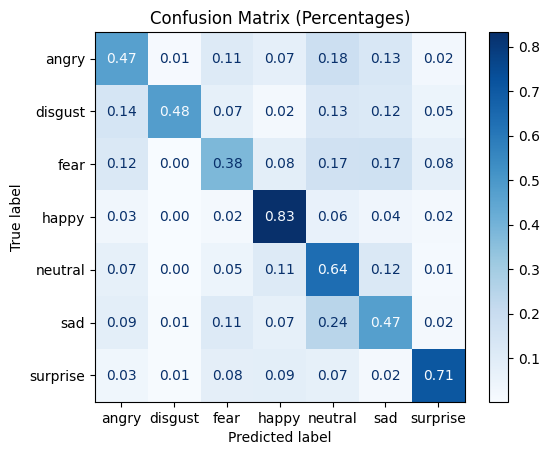

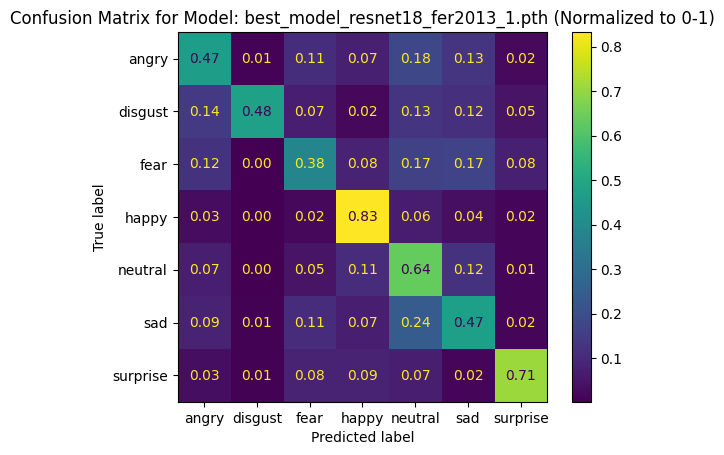

Confusion Matrix (Counts):
 [[ 463    8  120   85  107  143   34]
 [  17   63    8    7    6    5    5]
 [ 116    5  459   61   83  205   89]
 [  40    1   55 1538   76   84   31]
 [  93    6   86  146  593  254   38]
 [ 113   10  152   86  152  601   25]
 [  21    0   72   60   20   29  595]]
Confusion Matrix (Percentages):
 [[4.82291667e-01 8.33333333e-03 1.25000000e-01 8.85416667e-02
  1.11458333e-01 1.48958333e-01 3.54166667e-02]
 [1.53153153e-01 5.67567568e-01 7.20720721e-02 6.30630631e-02
  5.40540541e-02 4.50450450e-02 4.50450450e-02]
 [1.13948919e-01 4.91159136e-03 4.50884086e-01 5.99214145e-02
  8.15324165e-02 2.01375246e-01 8.74263261e-02]
 [2.19178082e-02 5.47945205e-04 3.01369863e-02 8.42739726e-01
  4.16438356e-02 4.60273973e-02 1.69863014e-02]
 [7.64802632e-02 4.93421053e-03 7.07236842e-02 1.20065789e-01
  4.87664474e-01 2.08881579e-01 3.12500000e-02]
 [9.92098332e-02 8.77963126e-03 1.33450395e-01 7.55048288e-02
  1.33450395e-01 5.27655838e-01 2.19490781e-02]
 [2.63488080

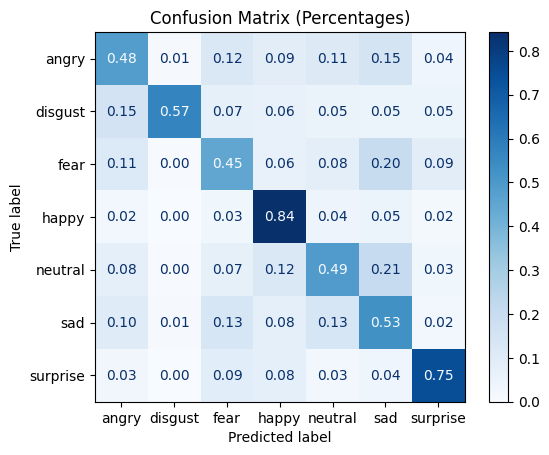

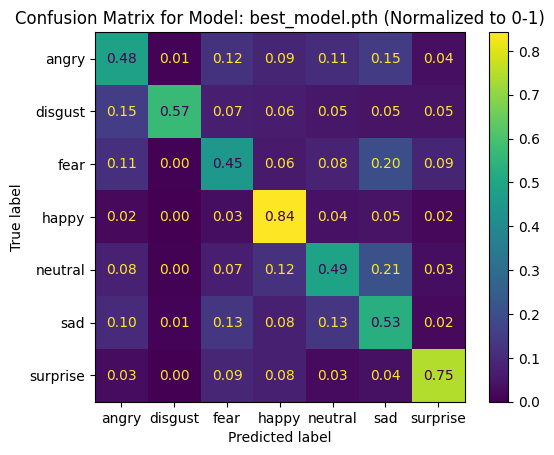

In [6]:
from approach.resnet import ResNet34, ResNet18
from approach.vgg import VGG
from approach.ResEmoteNet import ResEmoteNet

base_dir = "/workspace/fer2013"
dataloader, model_labels = load_data(base_dir=base_dir, batch_size=16, transform=transform)

model_architecture_map = {
    model_paths_fer2013[0] : VGG,
    model_paths_fer2013[1] : ResNet34,
    model_paths_fer2013[2] : ResNet18,
    model_paths_fer2013[3] : ResEmoteNet,
    # Add more mappings as needed
}

# Loop through the models, evaluate, and plot confusion matrices
for model_path in model_paths_fer2013:
    if model_path not in model_architecture_map:
        print(f"No architecture found for {model_path}")
        continue
    
    # Initialize the model
    model = model_architecture_map[model_path]()
    
    # Load the state dict
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    
    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Evaluate the model
    preds, labels = evaluate_model(model, dataloader, device)
    
    # Plot confusion matrix
    plot_confusion_matrix_normalized(labels, preds, f"Model: {model_path}", model_labels)

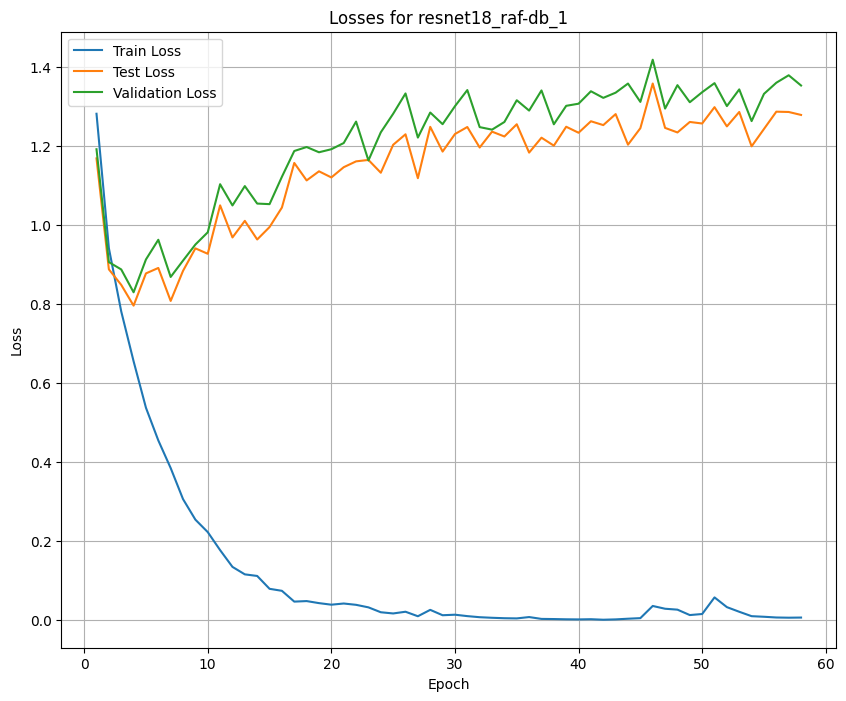

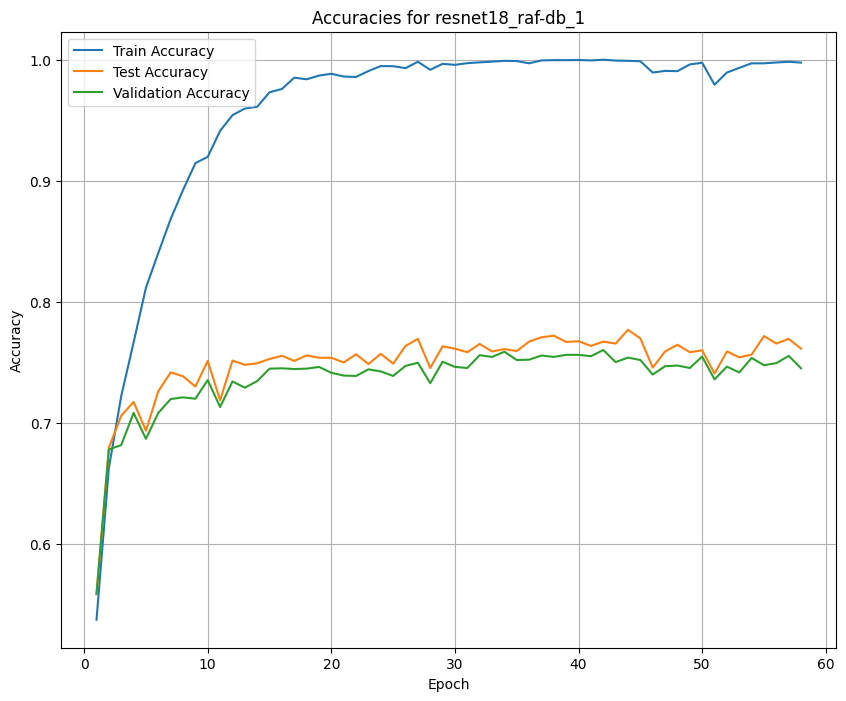

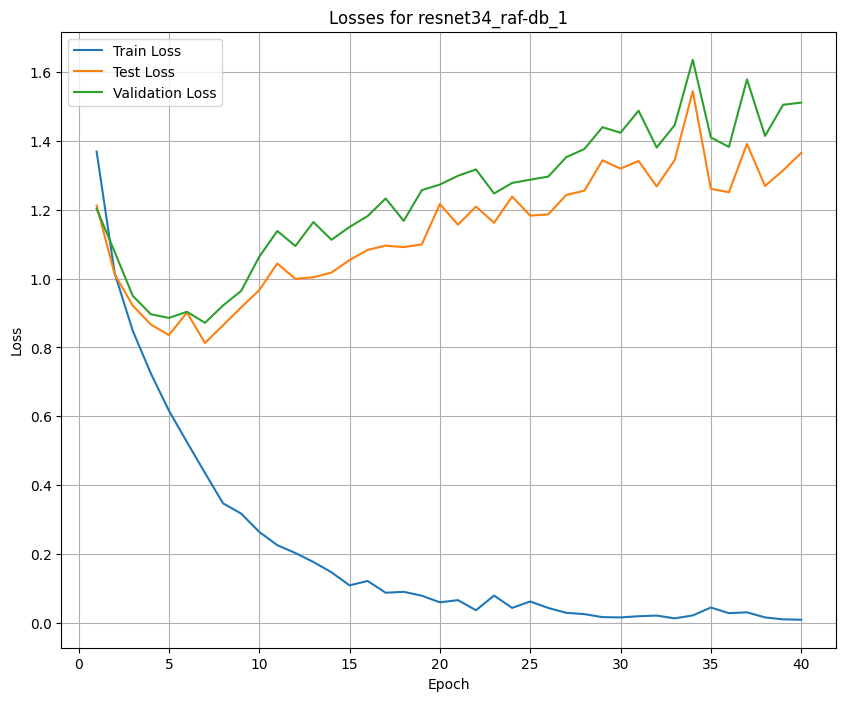

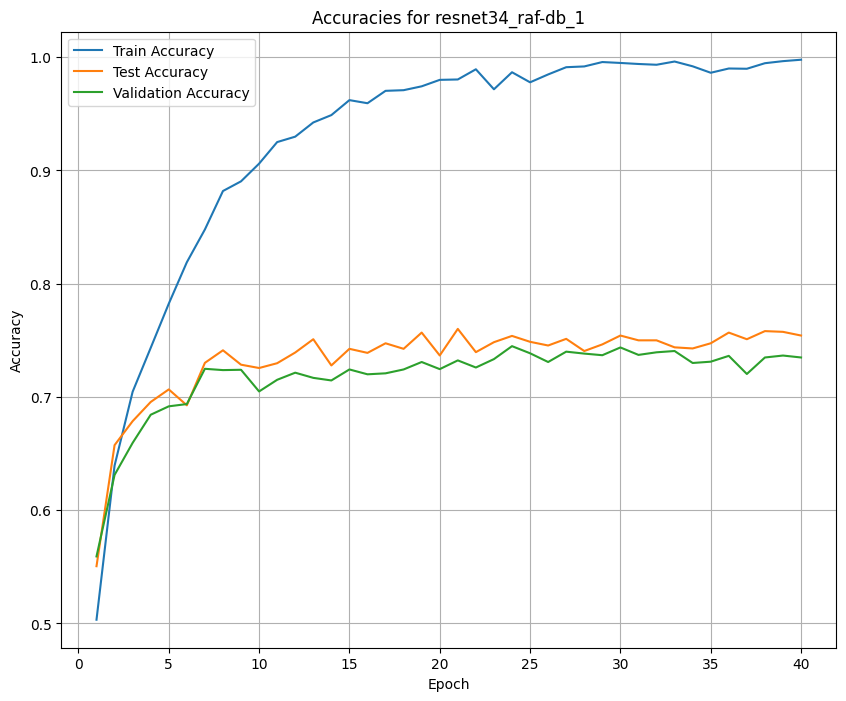

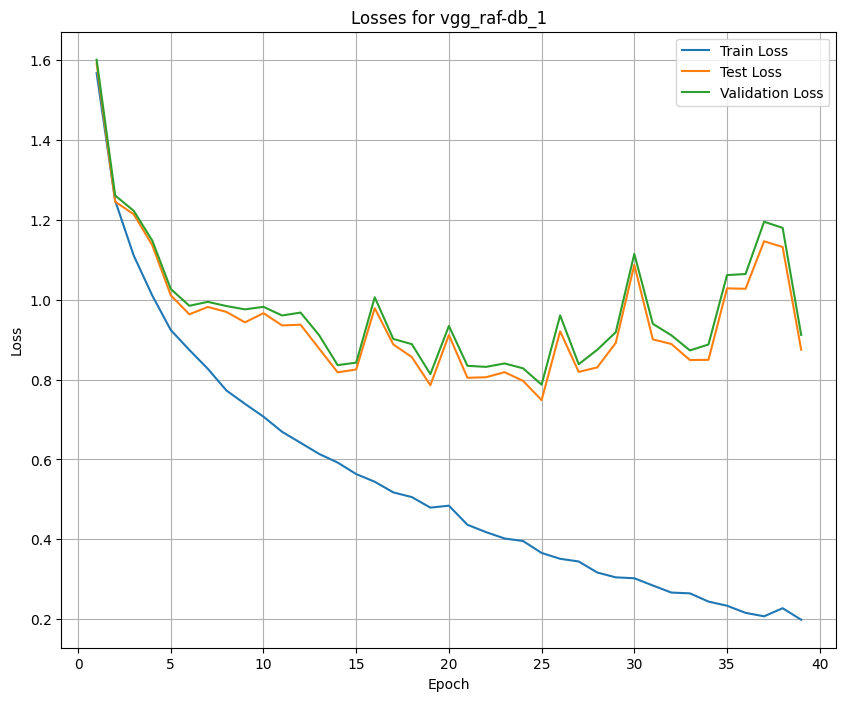

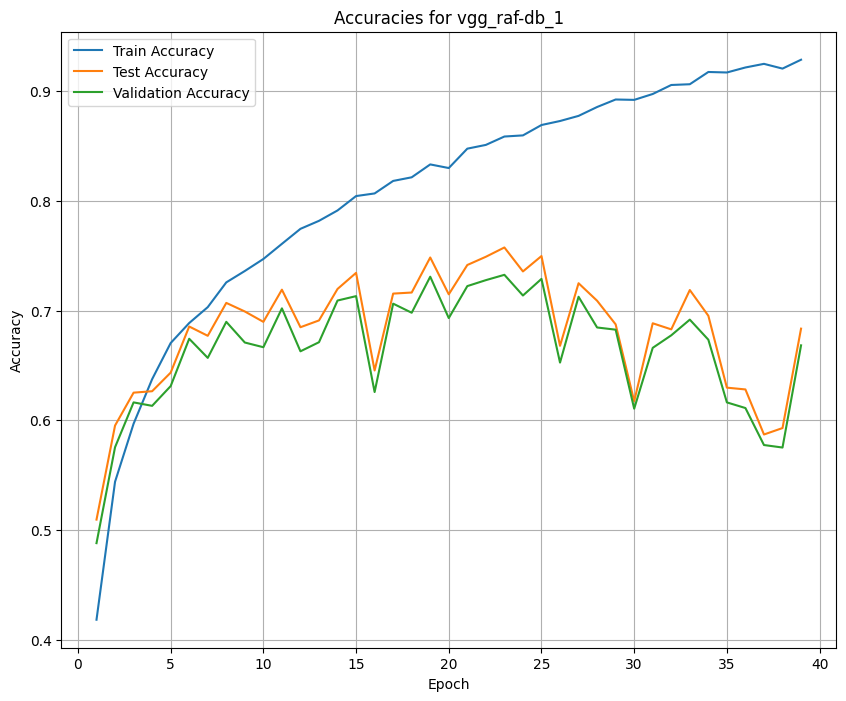

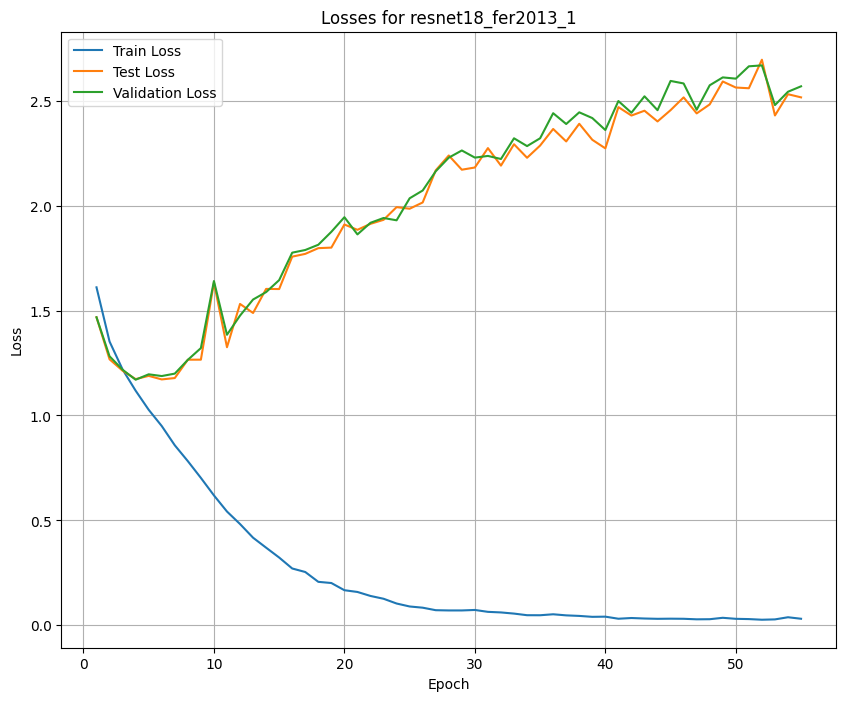

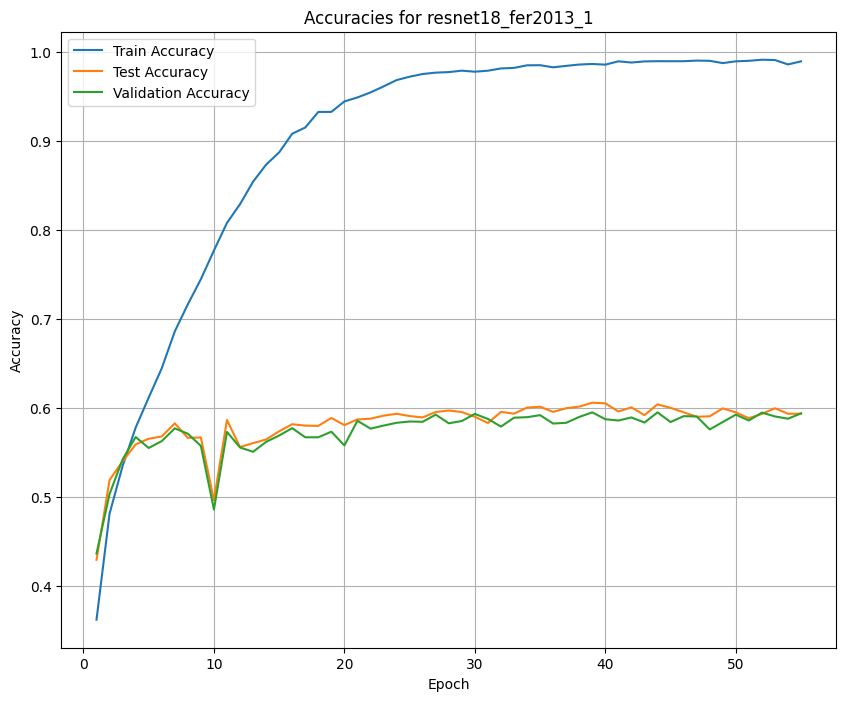

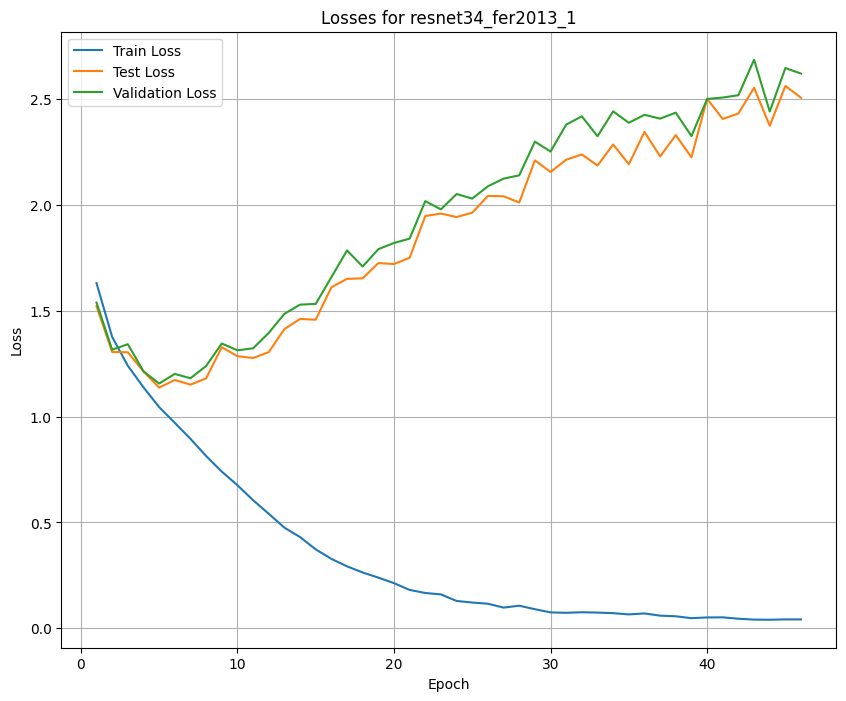

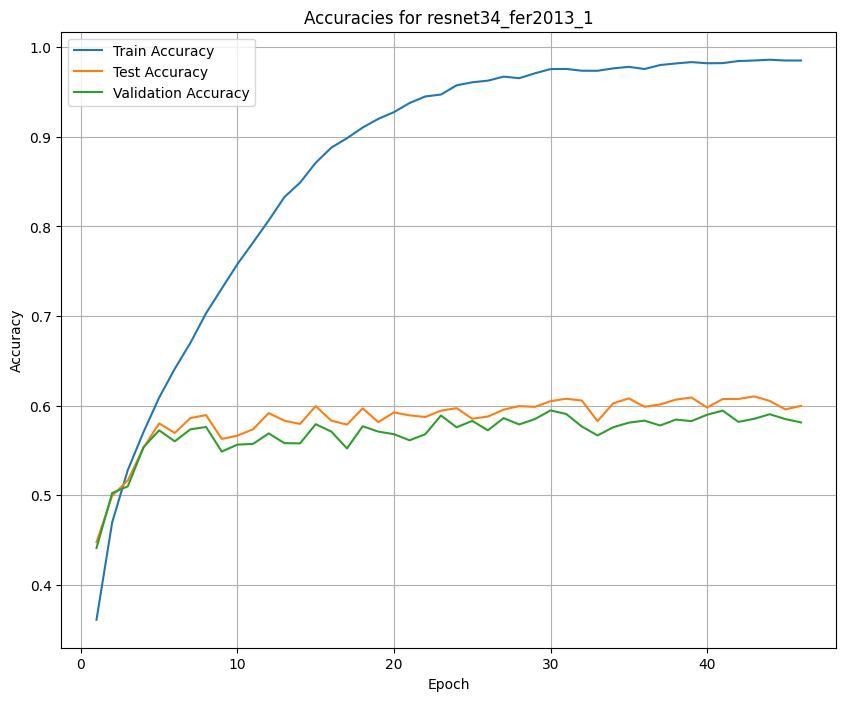

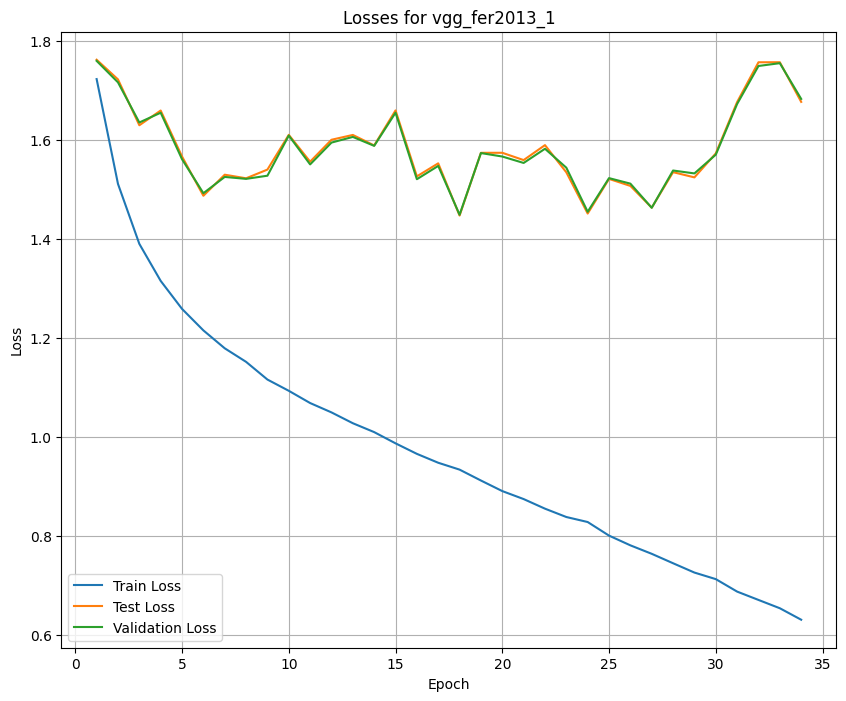

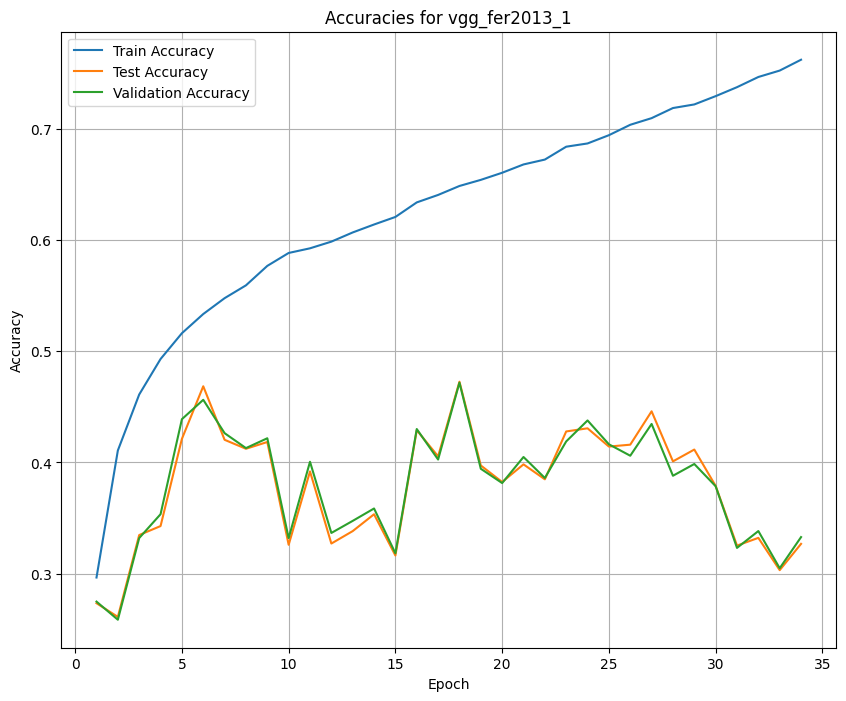

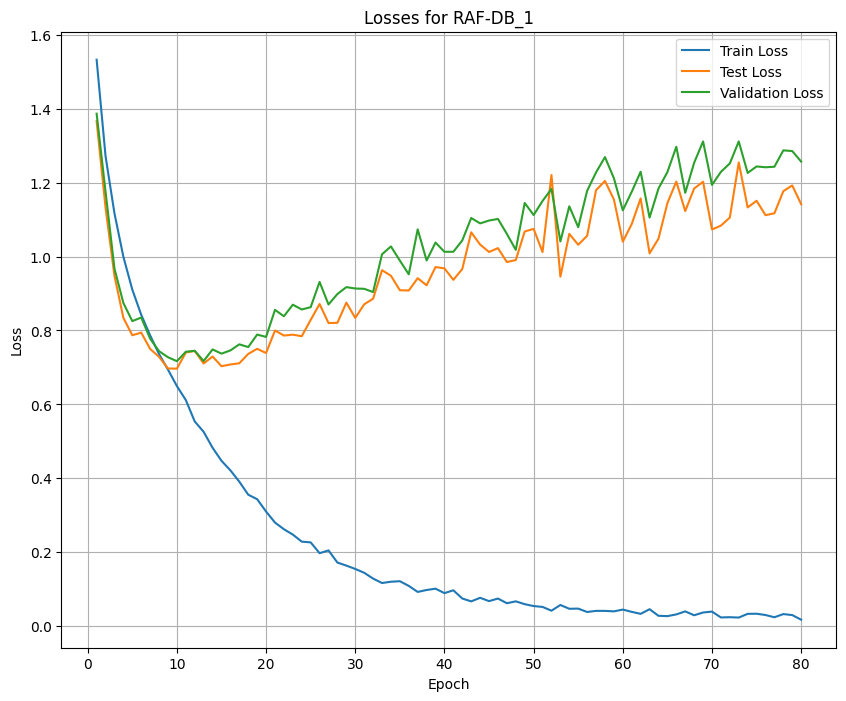

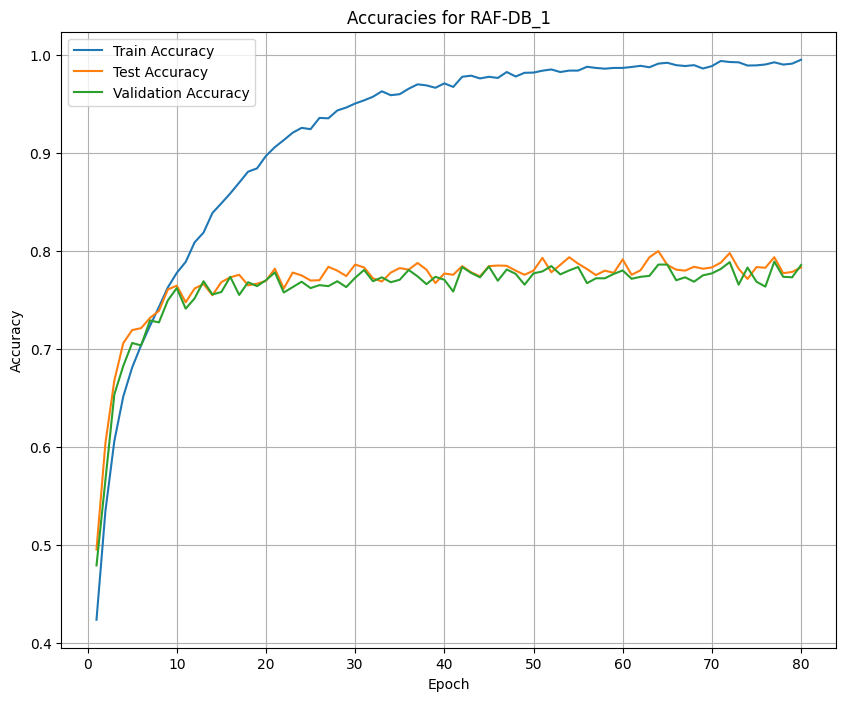

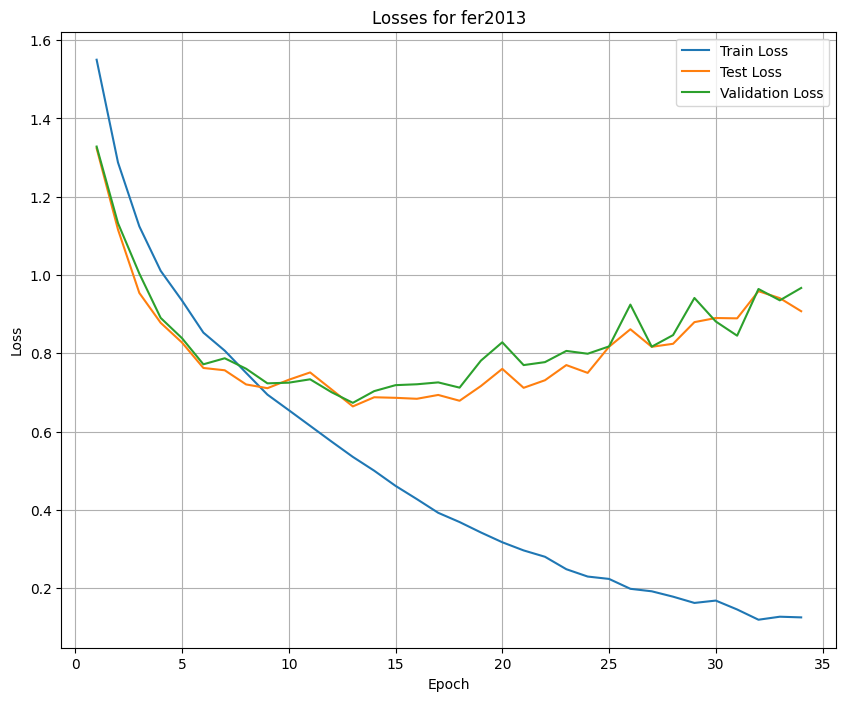

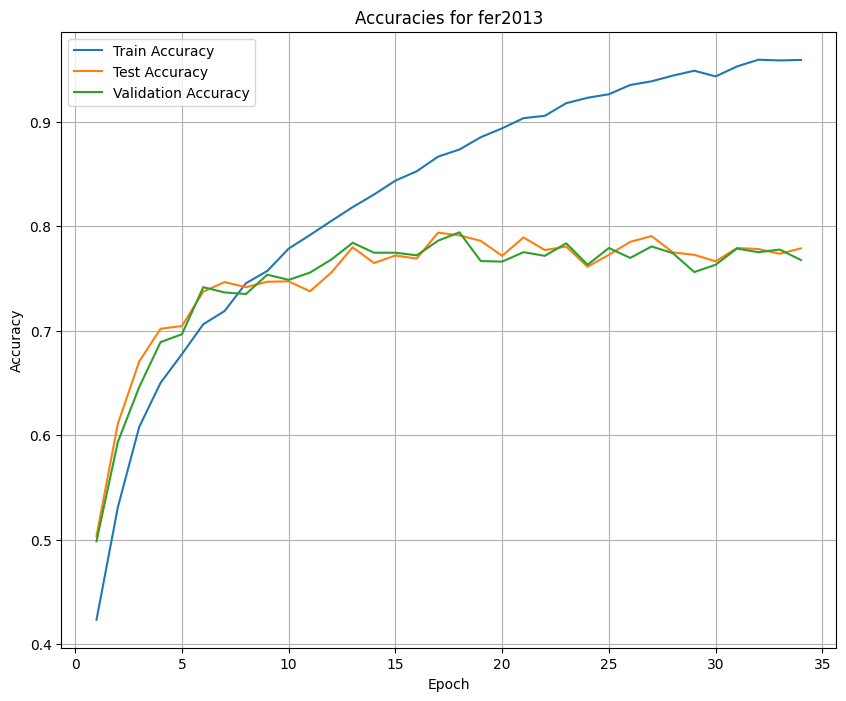

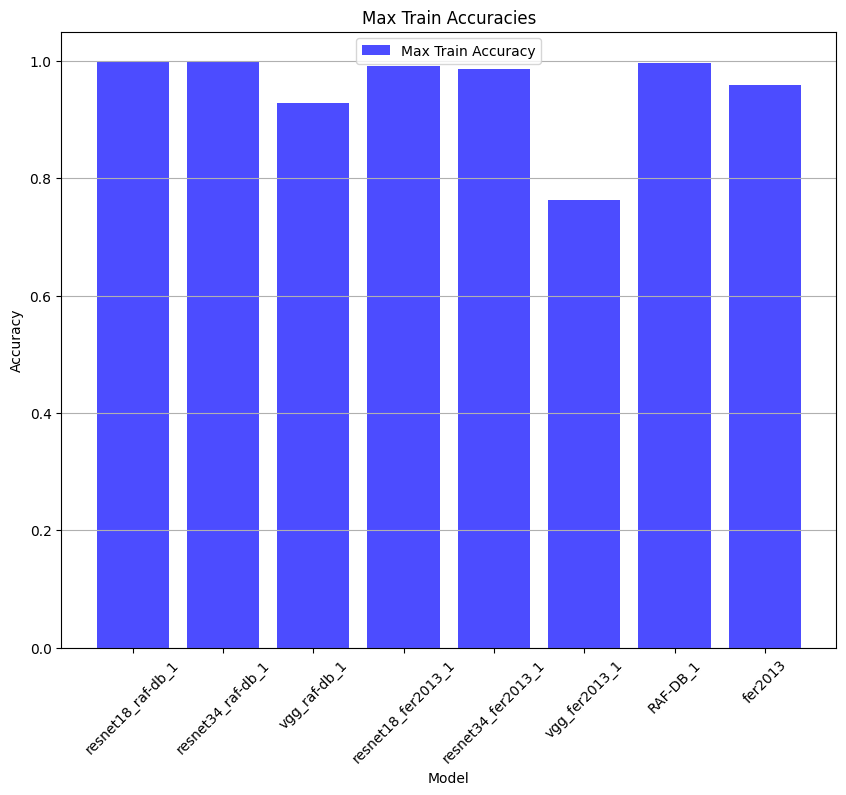

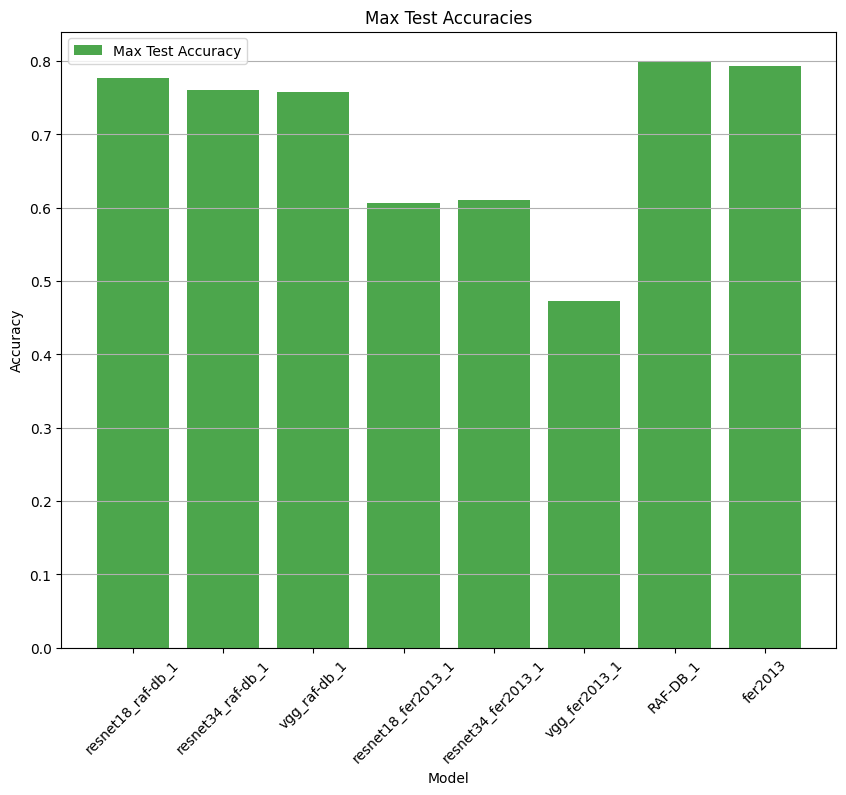

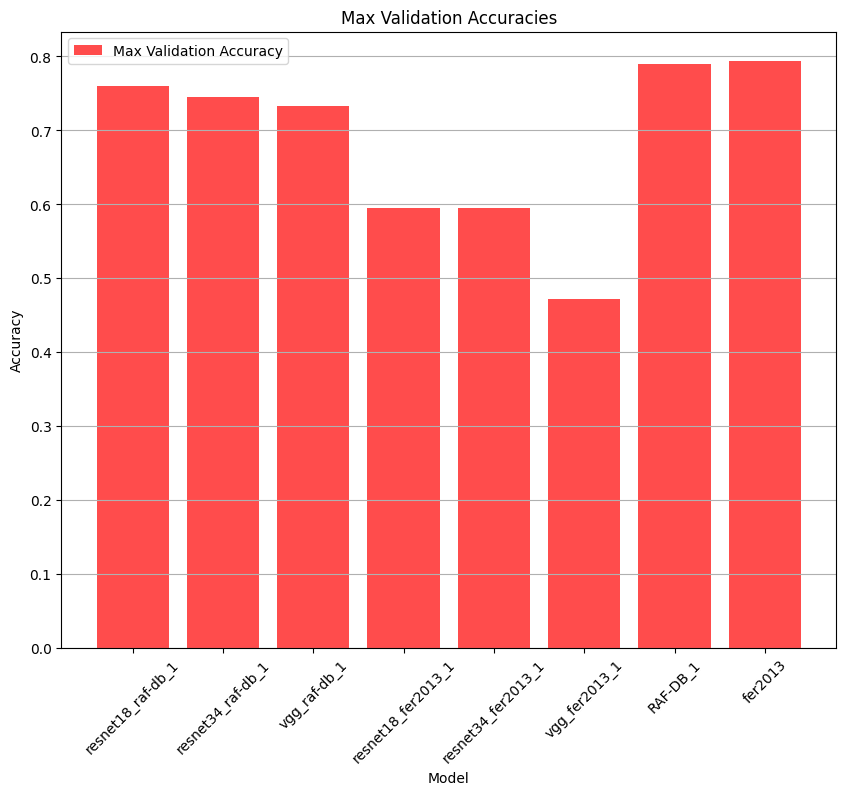

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_plot_data(model_names):
    max_accuracies = {
        'Model': [],
        'Max Train Accuracy': [],
        'Max Test Accuracy': [],
        'Max Validation Accuracy': []
    }

    for model_name in model_names:
        # Load the data from the CSV file
        csv_filename = f'result_{model_name}.csv'
        try:
            df = pd.read_csv(csv_filename)
        except FileNotFoundError:
            print(f"File {csv_filename} not found.")
            continue

        # Plot losses
        plt.figure(figsize=(10, 8))
        plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
        plt.plot(df['Epoch'], df['Test Loss'], label='Test Loss')
        plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
        plt.title(f'Losses for {model_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot accuracies
        plt.figure(figsize=(10, 8))
        plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
        plt.plot(df['Epoch'], df['Test Accuracy'], label='Test Accuracy')
        plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracies for {model_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Record max accuracies
        max_accuracies['Model'].append(model_name)
        max_accuracies['Max Train Accuracy'].append(df['Train Accuracy'].max())
        max_accuracies['Max Test Accuracy'].append(df['Test Accuracy'].max())
        max_accuracies['Max Validation Accuracy'].append(df['Validation Accuracy'].max())

    # Create a DataFrame for max accuracies
    max_accuracies_df = pd.DataFrame(max_accuracies)

    # Plot bar graphs for max accuracies
    plt.figure(figsize=(10, 8))
    plt.bar(max_accuracies['Model'], max_accuracies['Max Train Accuracy'], color='blue', alpha=0.7, label='Max Train Accuracy')
    plt.title('Max Train Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(max_accuracies['Model'], max_accuracies['Max Test Accuracy'], color='green', alpha=0.7, label='Max Test Accuracy')
    plt.title('Max Test Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.show()

    plt.figure(figsize=(10, 8))
    plt.bar(max_accuracies['Model'], max_accuracies['Max Validation Accuracy'], color='red', alpha=0.7, label='Max Validation Accuracy')
    plt.title('Max Validation Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.show()
# Example usage
models_names = ["resnet18_raf-db_1", "resnet34_raf-db_1", "vgg_raf-db_1", "resnet18_fer2013_1", "resnet34_fer2013_1", "vgg_fer2013_1", "RAF-DB_1","fer2013"]
load_and_plot_data(models_names)


